In [1]:
import numpy as np
import pandas as pd

In [2]:

df = pd.read_csv('haberman.csv',header=None, names=['age','operational_year','exil_node','survival'])

In [3]:

df.head()

,age,operational_year,exil_node,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
# Six Questions

In [5]:
df.shape

(306, 4)

In [6]:

df.isnull().sum()

age                 0
operational_year    0
exil_node           0
survival            0
dtype: int64

In [7]:

df.duplicated().sum()

np.int64(17)

In [8]:

df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 289 entries, 0 to 305
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   age               289 non-null    int64
 1   operational_year  289 non-null    int64
 2   exil_node         289 non-null    int64
 3   survival          289 non-null    int64
dtypes: int64(4)
memory usage: 11.3 KB


In [11]:

df.describe()


,age,operational_year,exil_node,survival
count,289.000000,289.000000,289.000000,289.000000
mean,52.422145,62.906574,4.221453,1.273356
std,10.876915,3.275794,7.325239,0.446455
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,5.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [12]:
# EDA

In [13]:
corr = df.corr()

<Axes: >

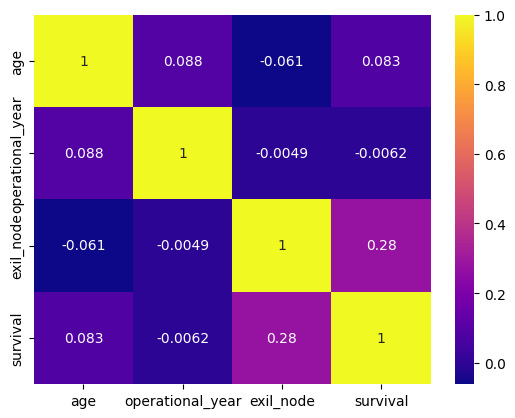

In [15]:

import seaborn as sns
sns.heatmap(corr,annot=True, cbar=True,cmap='plasma')

In [16]:
# Univariate analysis

In [ ]:
# Histogram and Distibution plot

In [ ]:
# A histogram is a graphical representation of the distribution of a numerical dataset. Seaborn's displot() function can be used to draw histograms.

C:\Windows\Temp\ipykernel_16832\3942404119.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['operational_year'])


<Axes: xlabel='operational_year', ylabel='Density'>

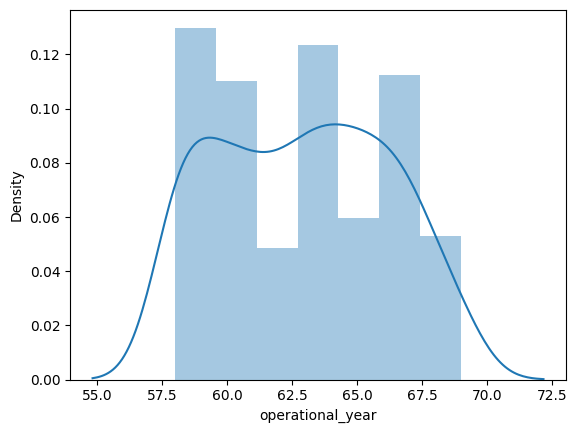

In [17]:

sns.distplot(df['operational_year'])

<Axes: xlabel='age', ylabel='Count'>

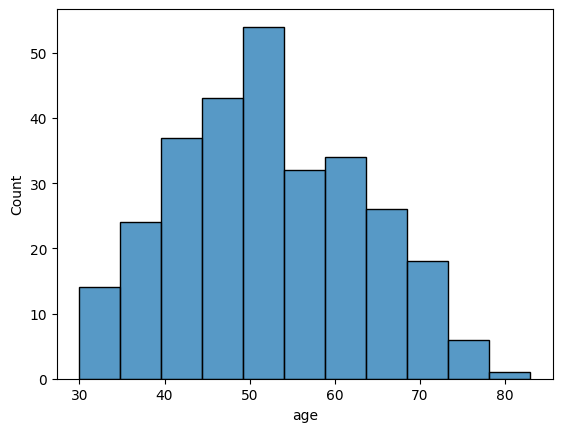

In [18]:
sns.histplot(df['age'])

In [19]:
# Relation

<Axes: xlabel='age', ylabel='survival'>

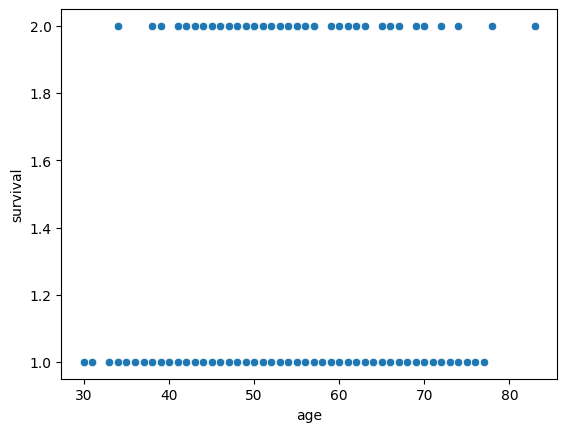

In [20]:
sns.scatterplot(x=df['age'],y=df['survival'])

In [ ]:

# train test split

In [21]:

X = df.drop("survival",axis=1)

In [22]:
y = df['survival']

In [23]:
X.shape

(289, 3)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
X_train.shape

(231, 3)

In [26]:
X_test.shape

(58, 3)

In [27]:
y_train.shape

(231,)

In [28]:

y_test.shape

(58,)

In [29]:
# Standarization

In [30]:

from sklearn.preprocessing import StandardScaler
sclr = StandardScaler()

In [31]:
sclr.fit(X_train)
X_train = sclr.transform(X_train)
X_test = sclr.transform(X_test)

In [32]:
# Training models

In [33]:

df['survival'].value_counts()

survival
1    210
2     79
Name: count, dtype: int64

In [34]:
# selecting model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

models = {
    'lg':LogisticRegression(),
    'dtc':DecisionTreeClassifier(),
    'gnb':GaussianNB()
}


for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred = mod.predict(X_test)
    
    print(f"{name} with accuracy : {accuracy_score(y_test,y_pred)}")



lg with accuracy : 0.7413793103448276
dtc with accuracy : 0.5517241379310345
gnb with accuracy : 0.7758620689655172


In [45]:

gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb.predict(X_test)

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1])

In [ ]:

# dtc = DecisionTreeClassifier()
# dtc.fit(X_train,y_train)
# dtc.predict(X_test)

array([1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1])

In [37]:
# Prediction system

In [46]:
def pred(age,oy,en):
    features = np.array([[age,oy,en]])
    features = sclr.fit_transform(features)
    pred = gnb.predict(features).reshape(1,-1)
    return pred[0]


age = 50
oy = 61
en = 2

res = pred(age,oy,en)


In [47]:
import pickle
pickle.dump(gnb,open('model.pkl','wb'))